In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('Ansur_Male_II.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   S.No                            4082 non-null   int64  
 1   Branch                          4082 non-null   object 
 2   Component                       4082 non-null   object 
 3   Gender                          4082 non-null   object 
 4   abdominalextensiondepthsitting  4082 non-null   int64  
 5   acromialheight                  4082 non-null   int64  
 6   acromionradialelength           4082 non-null   int64  
 7   anklecircumference              4082 non-null   int64  
 8   axillaheight                    4082 non-null   int64  
 9   balloffootcircumference         4082 non-null   int64  
 10  balloffootlength                4082 non-null   int64  
 11  biacromialbreadth               4082 non-null   int64  
 12  bicepscircumferenceflexed       4

In [2]:
data.head()

,S.No,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,...,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,0,Combat Arms,Regular Army,Male,266,1467,337,222,1347,253,...,240,440,1054,175,853,81.5,1.776,25.838761,Overweight,Tall
1,1,Combat Support,Regular Army,Male,233,1395,326,220,1293,245,...,225,371,1054,167,815,72.6,1.702,25.062103,Overweight,Normal
2,2,Combat Support,Regular Army,Male,287,1430,341,230,1327,256,...,255,411,1041,180,831,92.9,1.735,30.861480,Overweight,Normal
3,3,Combat Service Support,Regular Army,Male,234,1347,310,230,1239,262,...,205,399,968,176,793,79.4,1.655,28.988417,Overweight,Normal
4,4,Combat Service Support,Regular Army,Male,250,1585,372,247,1478,267,...,214,379,1245,188,954,94.6,1.914,25.823034,Overweight,Tall


In [3]:
data.isnull().sum()

S.No                              0
Branch                            0
Component                         0
Gender                            0
abdominalextensiondepthsitting    0
                                 ..
weight_kg                         0
stature_m                         0
BMI                               0
BMI_class                         0
Height_class                      0
Length: 100, dtype: int64

In [4]:
#WE can drop sno and gender column
data.drop(['S.No','Gender'],axis=1,inplace=True)

In [6]:
#numeric data
data_numeric=data.select_dtypes(include=['int64','float64'])

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
ss=StandardScaler()
x_scaled=ss.fit_transform(data_numeric)

In [9]:
y=data['BMI_class']

In [10]:
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [11]:
from sklearn.decomposition import PCA

In [12]:
x_scaled.shape

(4082, 94)

In [63]:
pca=PCA()
pca.fit(x_scaled)
cumulative_variance=pca.explained_variance_ratio_.cumsum()
n_components=(cumulative_variance>=0.95).argmax()+1
n_components,cumulative_variance

(35,
 array([0.44051665, 0.6207369 , 0.66252678, 0.69486579, 0.71754914,
        0.73849819, 0.75717598, 0.7718894 , 0.78598026, 0.79918369,
        0.81146733, 0.82295776, 0.83218687, 0.84131191, 0.85012807,
        0.8584072 , 0.86626997, 0.87345694, 0.88040077, 0.88693017,
        0.89313427, 0.89900015, 0.9046645 , 0.91003408, 0.91521265,
        0.92007299, 0.92458209, 0.9287637 , 0.9327456 , 0.93635863,
        0.93979365, 0.94298154, 0.94603209, 0.94880433, 0.95152607,
        0.9540111 , 0.95640306, 0.95870962, 0.96087257, 0.96291628,
        0.96488515, 0.96675178, 0.96851133, 0.97016858, 0.97176077,
        0.97331303, 0.97479361, 0.97622924, 0.9776409 , 0.97900449,
        0.98022451, 0.98138946, 0.98249926, 0.98355688, 0.98454696,
        0.98551067, 0.98639188, 0.98721166, 0.98802543, 0.98878359,
        0.98946938, 0.99014669, 0.99077661, 0.99139148, 0.99198534,
        0.99251544, 0.99303261, 0.99354199, 0.99403625, 0.9945038 ,
        0.99495589, 0.99538746, 0.99578629,

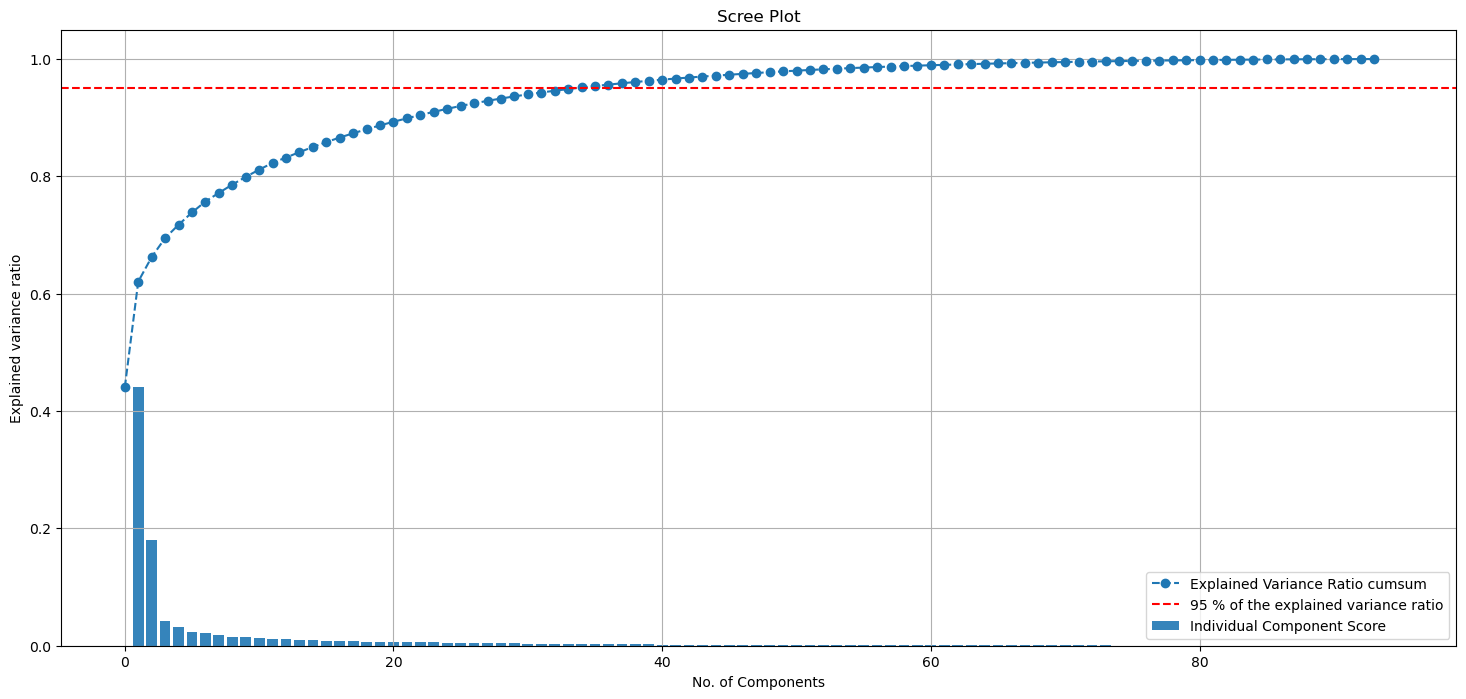

In [64]:
import matplotlib.pyplot as plt
explained_variance_ratio_cancer=pca.explained_variance_ratio_
plt.figure(figsize=(18,8))
plt.plot(np.cumsum(explained_variance_ratio_cancer),marker='o',linestyle='--',label="Explained Variance Ratio cumsum")
plt.bar(range(1,len(explained_variance_ratio_cancer)+1),explained_variance_ratio_cancer,alpha=0.9,label='Individual Component Score')
plt.title("Scree Plot")
plt.xlabel("No. of Components")
plt.ylabel("Explained variance ratio")
plt.axhline(y=0.95,color='red',linestyle='--',label='95 % of the explained variance ratio')
plt.xticks=range(1,len(explained_variance_ratio_cancer))
plt.legend()
plt.grid()
plt.show()
#no.of components is 35 where more than 95% of variance is explained

In [65]:
pca=PCA(n_components=36)#no. of components + 1
pca.fit(x_scaled)
prop_var=pca.explained_variance_ratio_
n_components=np.arange(pca.n_components_)+1


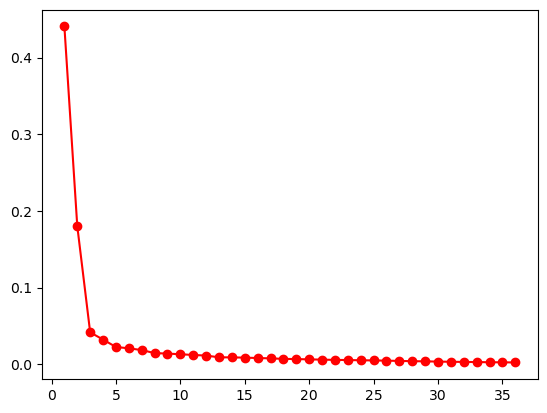

In [66]:
plt.plot(n_components,prop_var,'ro-')
plt.show()
#the elbow point occurs at 3 so we can build final pca with 3 components

In [67]:
pca_model=PCA(n_components=3)
dat_pca=pca_model.fit_transform(x_scaled)

In [68]:
data_pca

,PC1,PC2,PC3
0,-0.229094,-1.417097,1.410833
1,-5.426081,-1.362747,-0.781449
2,2.585937,1.780353,-1.622217
3,-5.536365,4.541041,-0.817398
4,14.312149,-10.513040,-3.005967
...,...,...,...
4077,-9.834514,-1.601886,-0.975259
4078,1.291608,0.775684,2.270906
4079,-4.697156,3.537617,0.769424
4080,-4.827560,-1.887479,-1.013279


In [69]:
data_pca=pd.DataFrame(dat_pca,columns=['PC1','PC2','PC3'])
final_df_pca=pd.concat([data_pca,y],axis=1)
final_df_pca

,PC1,PC2,PC3,BMI
0,-0.229094,-1.417097,1.410833,Overweight
1,-5.426081,-1.362747,-0.781449,Overweight
2,2.585937,1.780353,-1.622217,Overweight
3,-5.536365,4.541041,-0.817398,Overweight
4,14.312149,-10.513040,-3.005967,Overweight
...,...,...,...,...
4077,-9.834514,-1.601886,-0.975259,Normal
4078,1.291608,0.775684,2.270906,Overweight
4079,-4.697156,3.537617,0.769424,Overweight
4080,-4.827560,-1.887479,-1.013279,Normal


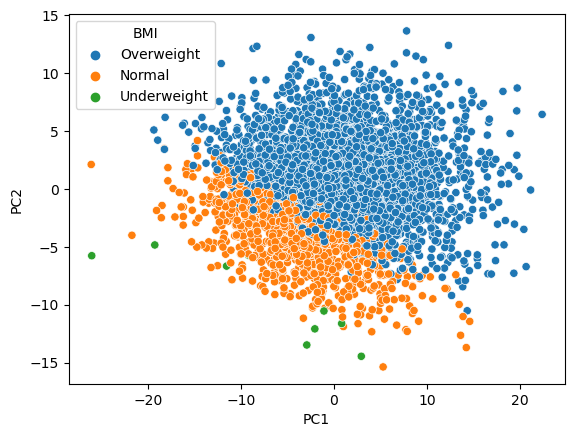

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=final_df_pca,x='PC1',y='PC2',hue='BMI')
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.show()

In [72]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
x=final_df_pca.drop('BMI',axis=1)
y=final_df_pca['BMI']

In [73]:
y_encoded=le.fit_transform(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.3,random_state=42)

In [74]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [75]:
ypred=rf.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy :  0.9428571428571428
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       321
           1       0.96      0.97      0.96       902
           2       0.00      0.00      0.00         2

    accuracy                           0.94      1225
   macro avg       0.62      0.62      0.62      1225
weighted avg       0.94      0.94      0.94      1225



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#We got an accuracy of 95% after reducing the no. of components to 3 using pca for random forest classifier and svc classifier

In [76]:
svc=SVC()

In [77]:
svc.fit(xtrain,ytrain)
svcpred=svc.predict(xtest)
print("Accuracy :",accuracy_score(ytest,svcpred))
print(classification_report(ytest,svcpred))

Accuracy : 0.9518367346938775
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       321
           1       0.96      0.97      0.97       902
           2       0.00      0.00      0.00         2

    accuracy                           0.95      1225
   macro avg       0.63      0.62      0.63      1225
weighted avg       0.95      0.95      0.95      1225



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
from sklearn.decomposition import TruncatedSVD
data_numeric.shape

(4082, 94)

In [78]:
n_components=data_numeric.shape[1]-1
n_components


93

In [79]:
svd=TruncatedSVD(n_components=n_components)
data_svd=svd.fit_transform(x_scaled)

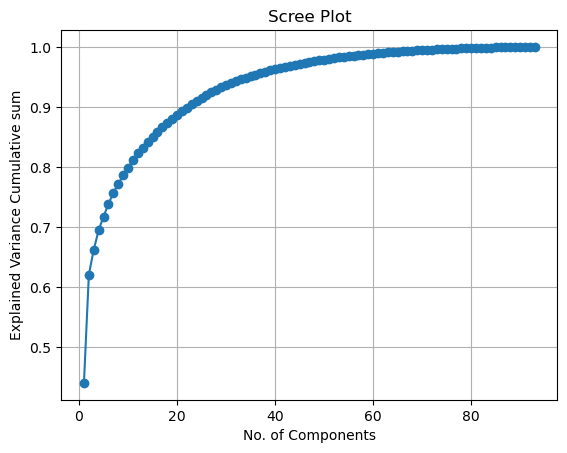

In [80]:
explained_variance=svd.explained_variance_ratio_.cumsum()
components=np.arange(n_components)+1
plt.plot(components,explained_variance,marker='o')
plt.xlabel("No. of Components")
plt.ylabel('Explained Variance Cumulative sum')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [81]:
#95 % of variance can be explained using 35 components according to the scree plot
cum_explained_variance=svd.explained_variance_ratio_.cumsum()
n_components=np.argmax(cum_explained_variance>=0.95)+1
n_components

35

In [82]:
finalsvd=TruncatedSVD(n_components=35)
data_svd=finalsvd.fit_transform(x_scaled)

In [83]:
data_svd.shape

(4082, 35)

In [84]:
svd_list = [f"SVD{i}" for i in range(1, 36)]


In [85]:
svddf=pd.DataFrame(data_svd,columns=svd_list)
svddf.head()

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,...,SVD26,SVD27,SVD28,SVD29,SVD30,SVD31,SVD32,SVD33,SVD34,SVD35
0,-0.229094,-1.417097,1.410833,-0.365382,0.340488,1.659842,-1.077704,-0.262661,0.074032,-0.839134,...,0.297063,-0.488250,-0.488384,0.074195,-0.383122,-0.196902,-0.681920,0.541699,0.910645,0.957656
1,-5.426081,-1.362747,-0.781449,-0.831816,0.060620,-0.243373,-0.048088,-1.066504,-1.957657,-0.654254,...,-0.206251,-0.492604,-0.612760,0.705093,-0.553520,-0.384593,0.742688,-0.892715,-0.250996,-0.007220
2,2.585937,1.780353,-1.622217,-0.315824,0.480312,-2.343115,-0.851835,0.115505,-1.004320,-0.549431,...,-1.123461,0.302440,-0.871297,0.655897,0.529633,-0.073787,0.312586,0.501722,-0.111260,-0.333749
3,-5.536365,4.541041,-0.817398,2.711439,0.242546,-1.229235,-1.746355,0.090928,-0.838169,0.753826,...,0.207830,-0.173267,-0.207852,-0.054835,-0.270823,0.356260,0.427350,0.209099,0.319165,-0.212323
4,14.312149,-10.513040,-3.005967,-1.827061,-0.503207,-2.767699,2.301238,-2.067523,-1.191530,1.128452,...,-1.272095,1.153121,-0.786577,-0.001370,-0.667775,0.995923,0.407426,-0.375342,-0.481688,-0.729962


In [86]:
final_df_svd=pd.concat([svddf,y],axis=1)
final_df_svd.head()

,SVD1,SVD2,SVD3,SVD4,SVD5,SVD6,SVD7,SVD8,SVD9,SVD10,...,SVD27,SVD28,SVD29,SVD30,SVD31,SVD32,SVD33,SVD34,SVD35,BMI
0,-0.229094,-1.417097,1.410833,-0.365382,0.340488,1.659842,-1.077704,-0.262661,0.074032,-0.839134,...,-0.488250,-0.488384,0.074195,-0.383122,-0.196902,-0.681920,0.541699,0.910645,0.957656,Overweight
1,-5.426081,-1.362747,-0.781449,-0.831816,0.060620,-0.243373,-0.048088,-1.066504,-1.957657,-0.654254,...,-0.492604,-0.612760,0.705093,-0.553520,-0.384593,0.742688,-0.892715,-0.250996,-0.007220,Overweight
2,2.585937,1.780353,-1.622217,-0.315824,0.480312,-2.343115,-0.851835,0.115505,-1.004320,-0.549431,...,0.302440,-0.871297,0.655897,0.529633,-0.073787,0.312586,0.501722,-0.111260,-0.333749,Overweight
3,-5.536365,4.541041,-0.817398,2.711439,0.242546,-1.229235,-1.746355,0.090928,-0.838169,0.753826,...,-0.173267,-0.207852,-0.054835,-0.270823,0.356260,0.427350,0.209099,0.319165,-0.212323,Overweight
4,14.312149,-10.513040,-3.005967,-1.827061,-0.503207,-2.767699,2.301238,-2.067523,-1.191530,1.128452,...,1.153121,-0.786577,-0.001370,-0.667775,0.995923,0.407426,-0.375342,-0.481688,-0.729962,Overweight


In [88]:
x=final_df_svd.drop('BMI',axis=1)
y=final_df_svd['BMI']

In [89]:
y_encoded=le.fit_transform(y)

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.3,random_state=42)

In [91]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [92]:
ypred=rf.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy :  0.9216326530612244
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       321
           1       0.93      0.97      0.95       902
           2       0.00      0.00      0.00         2

    accuracy                           0.92      1225
   macro avg       0.61      0.59      0.60      1225
weighted avg       0.92      0.92      0.92      1225



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [93]:
# We get an accuracy score of 0.92 after performing dimensionality reduction using svd and reducing the no. of features to 35
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [94]:
svcpred=svc.predict(xtest)
print('Accuracy : ',accuracy_score(ytest,svcpred))
print(classification_report(ytest,svcpred))

Accuracy :  0.976326530612245
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       321
           1       0.98      0.99      0.99       902
           2       0.00      0.00      0.00         2

    accuracy                           0.98      1225
   macro avg       0.65      0.65      0.65      1225
weighted avg       0.97      0.98      0.98      1225



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We get an accuracy of 98% by reducing the no. of features to 35 using SVD

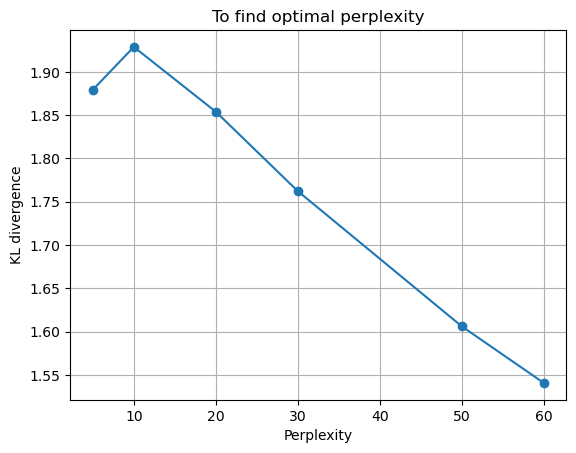

In [96]:
from sklearn.manifold import TSNE
perplex=[5,10,20,30,50,60]
kl_divergence=[]
for p in perplex:
    tsne=TSNE(n_components=2,perplexity=p,random_state=42)
    tsne.fit_transform(data_numeric)
    kl_divergence.append(tsne.kl_divergence_)
plt.plot(perplex,kl_divergence,marker='o')
plt.xlabel("Perplexity")
plt.ylabel('KL divergence')
plt.title("To find optimal perplexity")
plt.grid(True)
plt.show()

In [97]:
#The divergence is less at 50 first huge decrease happens at 50. Therefore the optimal perplexity is 50
op_tsne=TSNE(n_components=2,perplexity=50,learning_rate=100,n_iter=1000)
data_tsne=op_tsne.fit_transform(x_scaled)

C:\Users\91944\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [98]:
data_tsne

array([[ -3.7129219,  -3.0749695],
       [-18.195053 ,  -6.2213655],
       [ 11.127457 ,  15.812054 ],
       ...,
       [-20.202381 ,   9.730235 ],
       [-26.994349 ,  -4.6563096],
       [ 25.432207 ,  -6.756698 ]], dtype=float32)

In [99]:
data_df_tsne=pd.DataFrame()
data_df_tsne['TSNE Comp 1']=data_tsne[:,0]
data_df_tsne['TSNE Comp 2']=data_tsne[:,1]
data_df_tsne['BMI']=data['BMI_class']
data_df_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TSNE Comp 1  4082 non-null   float32
 1   TSNE Comp 2  4082 non-null   float32
 2   BMI          4082 non-null   object 
dtypes: float32(2), object(1)
memory usage: 63.9+ KB


<Axes: xlabel='TSNE Comp 1', ylabel='TSNE Comp 2'>

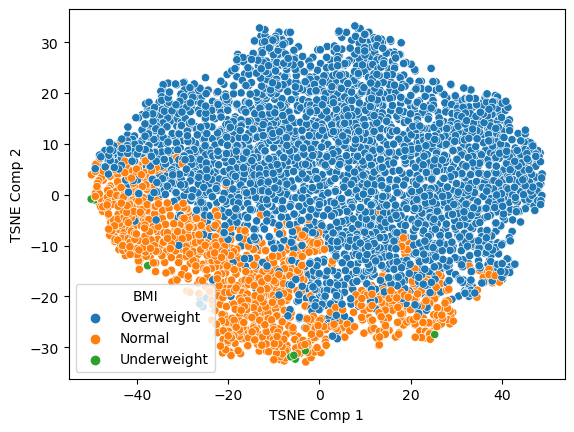

In [100]:
sns.scatterplot(data=data_df_tsne,x='TSNE Comp 1',y='TSNE Comp 2',hue="BMI")

In [101]:
x=data_df_tsne.drop('BMI',axis=1)
y=data_df_tsne['BMI']
y_encoded=le.fit_transform(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y_encoded,test_size=0.3,random_state=42)

In [102]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [103]:
ypred=rf.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy :  0.9314285714285714
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       321
           1       0.96      0.95      0.95       902
           2       0.00      0.00      0.00         2

    accuracy                           0.93      1225
   macro avg       0.61      0.61      0.61      1225
weighted avg       0.93      0.93      0.93      1225



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We get an accuracy of 93 after using dimensionality reduction tsne to the dataset for random forest model

In [104]:
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [105]:
svcpred=svc.predict(xtest)
print("Accuracy : ",accuracy_score(ytest,svcpred))
print(classification_report(ytest,svcpred))

Accuracy :  0.9216326530612244
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       321
           1       0.95      0.95      0.95       902
           2       0.00      0.00      0.00         2

    accuracy                           0.92      1225
   macro avg       0.60      0.60      0.60      1225
weighted avg       0.92      0.92      0.92      1225



C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91944\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


We get an accuracy of 92 % for the svc model after doing dimensionality reduction using tsne